In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal,stats

from scipy.fft import fft
from scipy import fft

# Para analisis estadistico
from scipy.stats import entropy
import math

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


1. De los artículos:

https://www.nature.com/articles/s41746-023-00966-w

https://www.nature.com/articles/s41598-020-59821-7

https://www.sciencedirect.com/science/article/pii/S2405844024032316

Para cada artículo hacer un diagrama de flujo de las metodologías usadas en los artículos (10%)


Explicar en sus palabras las metodologías desarrolladas (10%)



2. Descargar los datos ECGDataDenoised.zip de:
https://figshare.com/collections/ChapmanECG/4560497/1

De la base de datos extraer los registros que correspondan a bradicardia sinusal (SB Sinus Bradycardia) y fibrilación auricular (AFIB Atrial Fibrillation). Esta información está en el archivo Diagnostics.xlsx

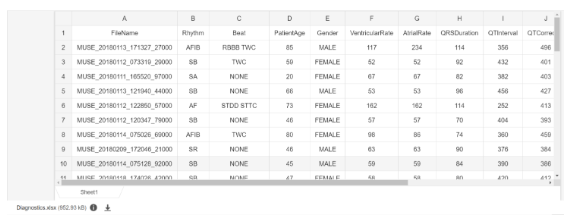

De estos registros los análisis para el presente proyecto deben hacerse en la derivación II

In [ ]:
!cp /content/drive/MyDrive/Biosenales/ECGDataDenoised.zip .
!unzip ECGDataDenoised.zip

Streaming output truncated to the last 5000 lines.
  inflating: ECGDataDenoised/MUSE_20180116_125802_57000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125812_73000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125822_43000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125825_58000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125842_09000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125845_27000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125847_39000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125906_02000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125918_29000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125919_34000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125921_43000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125925_64000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125946_45000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125948_54000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_130000_80000.csv  
  inflating: ECGDat

In [ ]:
directorio_actual=os.getcwd()
print(directorio_actual)

archivos=os.listdir(directorio_actual + "/ECGDataDenoised")
Tamano=len(archivos)
print(Tamano)
print(archivos)
print(archivos[1])

/content
10646
['MUSE_20180120_121001_43000.csv', 'MUSE_20180210_132908_17000.csv', 'MUSE_20180116_131029_02000.csv', 'MUSE_20180116_120813_70000.csv', 'MUSE_20180116_175255_75000.csv', 'MUSE_20180113_073756_28000.csv', 'MUSE_20180113_183723_26000.csv', 'MUSE_20180113_181610_53000.csv', 'MUSE_20180113_133402_02000.csv', 'MUSE_20180112_124630_80000.csv', 'MUSE_20180115_130545_31000.csv', 'MUSE_20180209_173704_09000.csv', 'MUSE_20180113_134942_37000.csv', 'MUSE_20180209_125816_49000.csv', 'MUSE_20180116_125842_09000.csv', 'MUSE_20180114_120114_84000.csv', 'MUSE_20180112_122717_13000.csv', 'MUSE_20180209_123939_95000.csv', 'MUSE_20180118_170508_87000.csv', 'MUSE_20180210_130710_01000.csv', 'MUSE_20180113_122318_73000.csv', 'MUSE_20180113_172714_60000.csv', 'MUSE_20180118_173613_78000.csv', 'MUSE_20180119_170145_80000.csv', 'MUSE_20180116_130925_73000.csv', 'MUSE_20180112_165018_93000.csv', 'MUSE_20180112_133525_62000.csv', 'MUSE_20180116_133517_43000.csv', 'MUSE_20180712_151144_27000.csv'

In [ ]:
file_path = '/content/drive/MyDrive/Biosenales/Diagnostics.xlsx'
#file_path = 'E:\ACTUAL\BIOSIGNALS\GIT\LAB_ISA_ZAM\Lab_Biosenales\Proyecto_2\Diagnostics.xlsx'

Diagnostics = pd.read_excel(file_path, sheet_name='Sheet1')    # Extraer clasificaciones sujetos
Col_Nombres = pd.DataFrame(Diagnostics.iloc[:,0:2])

Nombres_SB = Col_Nombres[Col_Nombres['Rhythm']=='SB']
Nombres_AFIB = Col_Nombres[Col_Nombres['Rhythm']=='AFIB']

lista_filtrada_SB=[] #Lista con los datos de SB y AFIB
lista_filtrada_AFIB=[]#Lista con los datos de AFIB

for i in range(len(archivos)):
    if archivos[i] in Nombres_SB['FileName'].values+'.csv':
      lista_filtrada_SB.append(archivos[i])

    if archivos[i] in Nombres_AFIB['FileName'].values+'.csv':
        lista_filtrada_AFIB.append(archivos[i])


In [ ]:
Derivacion2_AFIB=[]
Derivacion2_SB=[]

for i in lista_filtrada_AFIB:
    datos = pd.read_csv(directorio_actual+"/ECGDataDenoised/"+i,delimiter=',',names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4','V5','V6'])
    Derivacion2_AFIB.append(datos['II'])


for i in lista_filtrada_SB:
    datos = pd.read_csv(directorio_actual+"/ECGDataDenoised/"+i,delimiter=',',names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4','V5','V6'])
    Derivacion2_SB.append(datos['II'])


Derivacion2_AFIB=np.array(pd.DataFrame(Derivacion2_AFIB))
Derivacion2_SB = np.array(pd.DataFrame(Derivacion2_SB))

señales_limpias = [senal for senal in Derivacion2_AFIB if not np.isnan(senal).any()]
Derivacion2_AFIB = [senal for senal in señales_limpias if np.any(senal != 0)]

señales_limpias2 = [senal for senal in Derivacion2_SB if not np.isnan(senal).any()]
Derivacion2_SB = [senal for senal in señales_limpias2 if np.any(senal != 0)]

Derivacion2_AFIB=np.array(pd.DataFrame(Derivacion2_AFIB))
Derivacion2_SB = np.array(pd.DataFrame(Derivacion2_SB))


print(Derivacion2_AFIB.shape,"# señales * # puntos")
print(Derivacion2_SB.shape)
print(type(Derivacion2_AFIB))
print(type(Derivacion2_SB))


(1780, 5000) # señales * # puntos
(3888, 5000)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### SEÑALES INICIALES

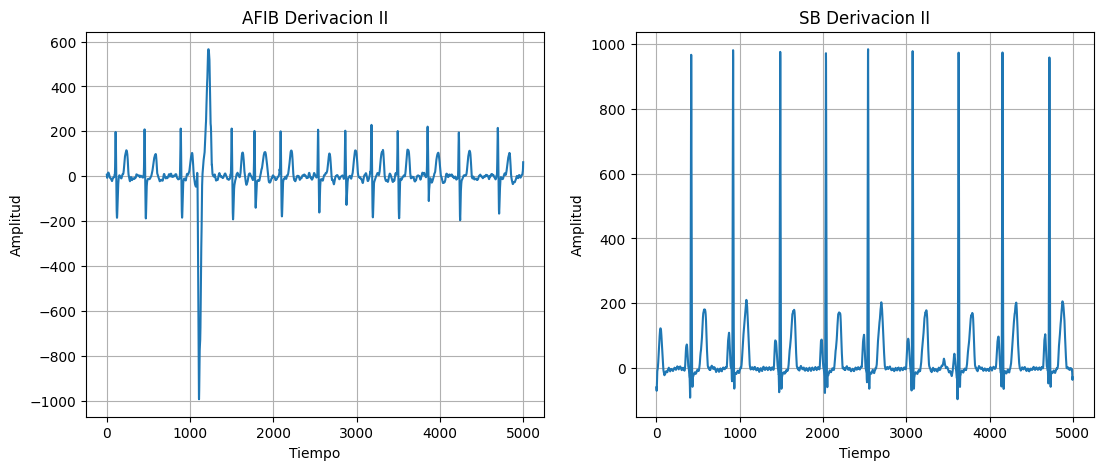

In [ ]:
plt.figure(figsize=(13, 5))
plt.subplot(1,2,1)
plt.title('AFIB Derivacion II')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)
plt.plot(Derivacion2_AFIB[0])

plt.subplot(1,2,2)
plt.title('SB Derivacion II')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.plot(Derivacion2_SB[0])
plt.grid(True)
plt.show()

3. Programar las fórmulas 1 al 4 que se encuentran en el artículo (15%). **Consultar que significado y utilidad del biespectro** (Realice la gráfica) (5%) https://arxiv.org/pdf/1809.08451


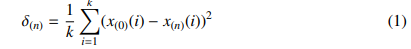


### DETREND 1

In [ ]:
def Rutina_D(archivo):
  senal=signal.detrend(archivo)
  return senal

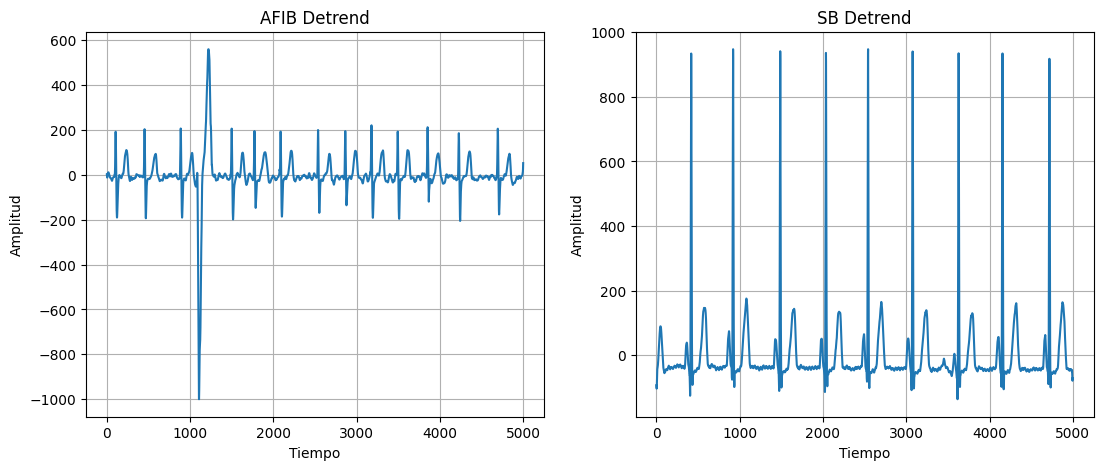

In [ ]:
Detrend1_AFIB=Rutina_D(Derivacion2_AFIB[0])
Detrend1_SB=Rutina_D(Derivacion2_SB[0])
plt.figure(figsize=(13, 5))
plt.subplot(1,2,1)
plt.title('AFIB Detrend')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)
plt.plot(Detrend1_AFIB)

plt.subplot(1,2,2)
plt.title('SB Detrend')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.plot(Detrend1_SB)
plt.grid(True)
plt.show()

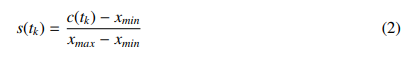


### COMPRESIÓN

In [ ]:

def comprimir(c_tk):
    x_min = np.amin(c_tk)
    x_max = np.amax(c_tk)
    Datos_comprimir = (c_tk - x_min) / (x_max - x_min)
    return Datos_comprimir

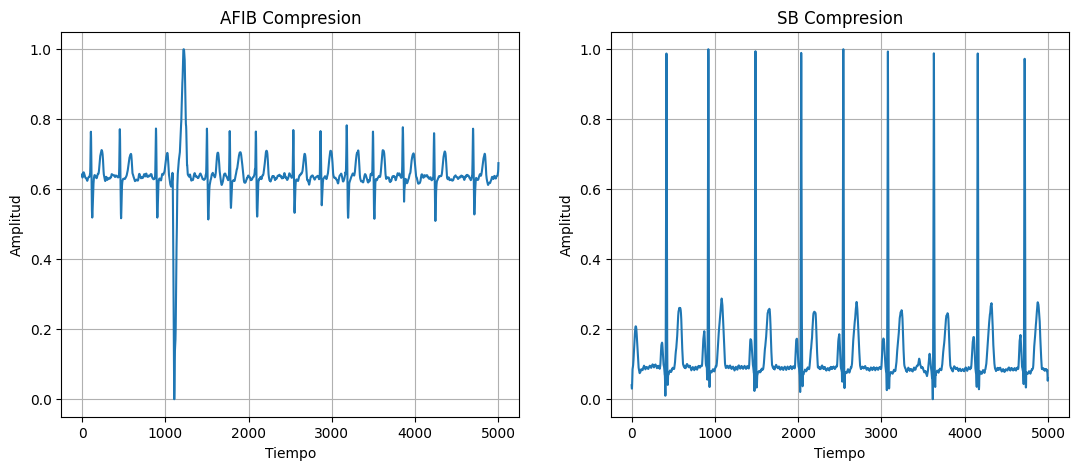

In [ ]:
comprimir_SB=comprimir(Detrend1_SB)
comprimir_AFIB=comprimir(Detrend1_AFIB)
plt.figure(figsize=(13, 5))
plt.subplot(1,2,1)
plt.title('AFIB Compresion')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)
plt.plot(comprimir_AFIB)

plt.subplot(1,2,2)
plt.title('SB Compresion')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.plot(comprimir_SB)
plt.grid(True)
plt.show()

### DETREND 2

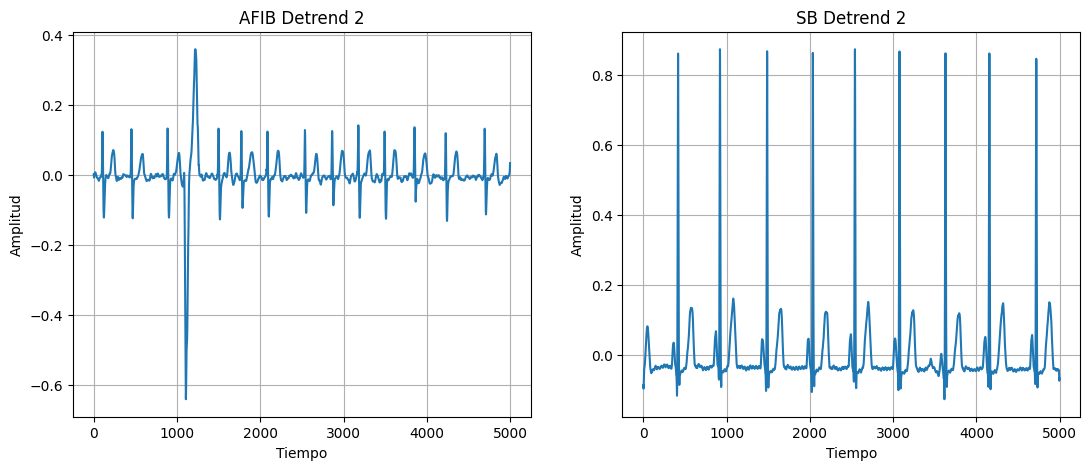

In [ ]:
Detrend2_AFIB=Rutina_D(comprimir_AFIB)
Detrend2_SB=Rutina_D(comprimir_SB)
plt.figure(figsize=(13, 5))
plt.subplot(1,2,1)
plt.title('AFIB Detrend 2')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)
plt.plot(Detrend2_AFIB)

plt.subplot(1,2,2)
plt.title('SB Detrend 2')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.plot(Detrend2_SB)
plt.grid(True)
plt.show()


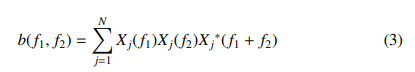

### BIESPECTRO

In [ ]:
def calcular_bispectro(senal, N, fmin, fmax):

    segmentos = np.array_split(senal, N)    # Dividir la señal en N segmentos
    X = np.fft.fft(segmentos, axis=1)       # Calcular la transformada de Fourier de cada segmento
    M = X.shape[1]                          # Número de muestras por segmento

    fmin_idx = int(fmin * M / len(senal))   # frecuencias mínima y máxima
    fmax_idx = int(fmax * M / len(senal))
    bispectro = np.zeros((fmax_idx - fmin_idx + 1, fmax_idx - fmin_idx + 1), dtype=complex)
    for i in range(fmin_idx, fmax_idx + 1):
        for j in range(i, fmax_idx + 1):
            k = (i + j) % M
            bispectro[i - fmin_idx, j - fmin_idx] = np.sum(X[:, i] * X[:, j] * np.conj(X[:, k])) / N
            if i != j:
                bispectro[j - fmin_idx, i - fmin_idx] = bispectro[i - fmin_idx, j - fmin_idx].conjugate()

    return bispectro


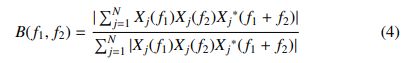

### BICOHERENCIA

In [ ]:
def calcular_bicoherencia(signal, num_segments, fmin, fmax):
    N = len(signal)
    segment_length = N // num_segments
    signal_segments = np.array([signal[i * segment_length:(i + 1) * segment_length] for i in range(num_segments)])  # Dividir la señal en segmentos
    fft_segments = np.fft.fft(signal_segments, axis=1)      # Calcular la transformada de Fourier para cada segmento

    fmin_idx = int(fmin / (segment_length / N))             # Frecuencias mínima y máxima
    fmax_idx = int(fmax / (segment_length / N))
    bicoherence = np.zeros((fmax_idx - fmin_idx + 1, fmax_idx - fmin_idx + 1), dtype=np.complex128) #Matriz bc

    for i in range(fmin_idx, fmax_idx + 1):
        for j in range(i, fmax_idx + 1):
            k = (i + j) % segment_length
            numerador = np.sum(fft_segments[:, i] * fft_segments[:, j] * np.conj(fft_segments[:, k]))
            denominador = np.sqrt(np.sum(np.abs(fft_segments[:, i] * fft_segments[:, j] * fft_segments[:, k]) ** 2))
            bicoherence[i - fmin_idx, j - fmin_idx] = numerador / denominador
            if i != j:
                bicoherence[j - fmin_idx, i - fmin_idx] = np.conj(bicoherence[i - fmin_idx, j - fmin_idx])

    return bicoherence


<Figure size 800x600 with 0 Axes>

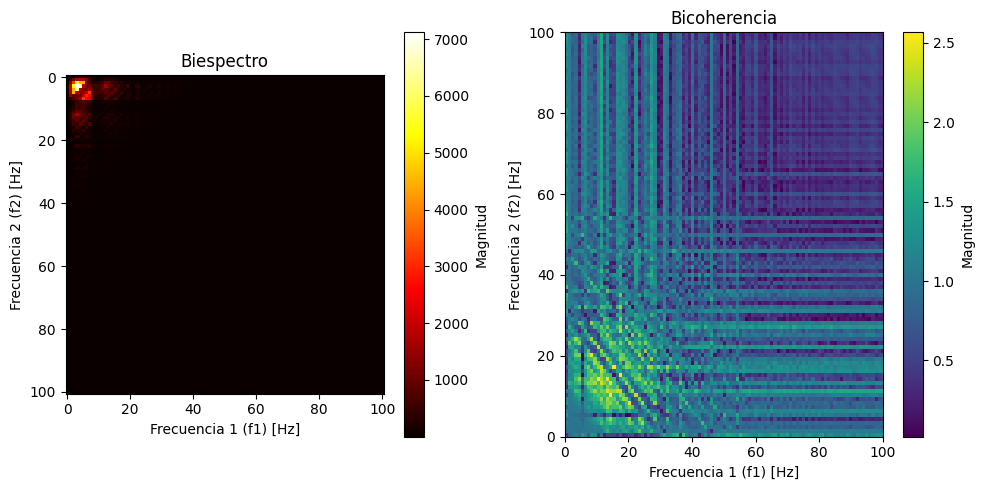

In [ ]:
def graficar_bicoherencia_bispectro(bicoherence_magnitude, bispectro):
    plt.figure(figsize=(8, 6))
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Graficar la primera matriz
    im1 = axes[0].imshow(np.abs(bispectro), cmap='hot')
    axes[0].set_title('Biespectro')
    axes[0].set_xlabel('Frecuencia 1 (f1) [Hz]')
    axes[0].set_ylabel('Frecuencia 2 (f2) [Hz]')
    fig.colorbar(im1, ax=axes[0], label='Magnitud')

    # Graficar la segunda matriz
    im2 = axes[1].imshow(bicoherence_magnitude, extent=[0, np.max(np.arange(bicoherence_magnitude.shape[0])),
                                                0, np.max(np.arange(bicoherence_magnitude.shape[1]))],
                        origin='lower', aspect='auto', cmap='viridis')

    axes[1].set_title('Bicoherencia')
    plt.xlabel('Frecuencia 1 (f1) [Hz]')
    plt.ylabel('Frecuencia 2 (f2) [Hz]')
    fig.colorbar(im2, ax=axes[1], label='Magnitud')

    plt.tight_layout()
    plt.show()

bicoherence_matrix=calcular_bicoherencia(Detrend2_AFIB,10,0,10)
bicoherence_magnitude = np.abs(bicoherence_matrix)
AFIB_bispectro = calcular_bispectro(Detrend2_AFIB, 5,0,500)
graficar_bicoherencia_bispectro(bicoherence_magnitude, AFIB_bispectro)

In [ ]:
def graficar2_bicoherencias(bicoherence1, bicoherence2, bicoherence1Name,bicoherence2Name):

    plt.figure(figsize=(8, 6))
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    im1 = axes[0].imshow(bicoherence1, extent=[0, np.max(np.arange(bicoherence1.shape[0])),
                                                0, np.max(np.arange(bicoherence1.shape[1]))],
                        origin='lower', aspect='auto', cmap='viridis')

    axes[0].set_title('Bicoherencia '+bicoherence1Name)
    axes[0].set_xlabel('Frecuencia 1 (f1) [Hz]')
    axes[0].set_ylabel('Frecuencia 2 (f2) [Hz]')
    fig.colorbar(im1, ax=axes[0], label='Magnitud')

    im2 = axes[1].imshow(bicoherence2, extent=[0, np.max(np.arange(bicoherence2.shape[0])),
                                                0, np.max(np.arange(bicoherence2.shape[1]))],
                        origin='lower', aspect='auto', cmap='viridis')
    axes[1].set_title('Bicoherencia '+bicoherence2Name)
    axes[1].set_xlabel('Frecuencia 1 (f1) [Hz]')
    axes[1].set_ylabel('Frecuencia 2 (f2) [Hz]')
    fig.colorbar(im2, ax=axes[1], label='Magnitud')
    plt.tight_layout()

    plt.show()

4. Para cada señal extraer la frecuencia que contiene la máxima potencia y gráfiquela (15%)


In [ ]:
def fft_signal(signal):
  EKG = fft.fft(signal)
  fs = 500 #Frecuencia de muestreo
  N = signal.shape[0]  # Número de muestras en la señal
  f = np.arange(0,fs,fs/N)
  return EKG,f,N

### TRANSFORMADA RAPIDA DE FOURIER

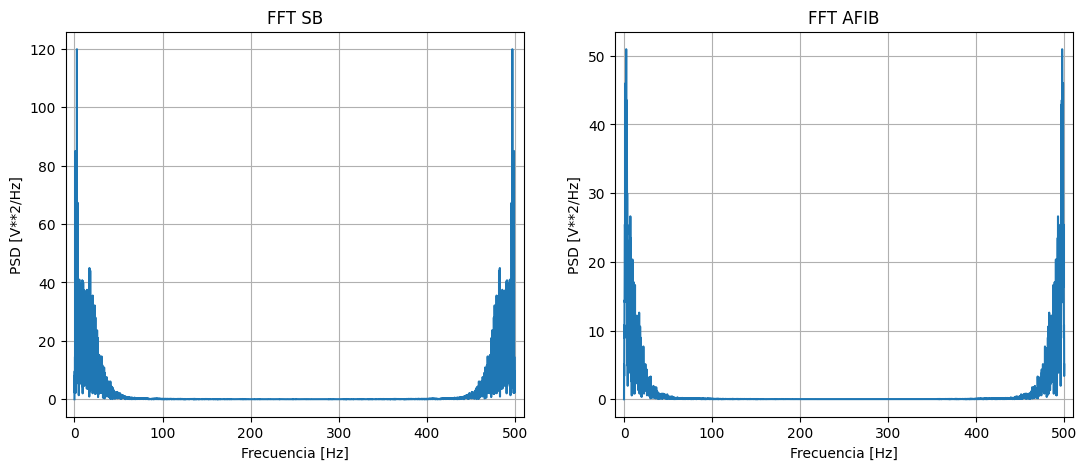

In [ ]:
fft_SB=fft_signal(Detrend2_SB)
fft_AFIB=fft_signal(Detrend2_AFIB)

plt.figure(figsize=(13, 5))
plt.subplot(1,2,1)
plt.title('FFT SB')
plt.xlim([-10,510])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.grid(True)
plt.plot(fft_SB[1], np.abs(fft_SB[0]))

plt.subplot(1,2,2)
plt.title('FFT AFIB')
plt.grid(True)
plt.plot(fft_AFIB[1], np.abs(fft_AFIB[0]))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.xlim([-10,510])
plt.show()

### DENSIDAD ESPECTRAL DE POTENCIA

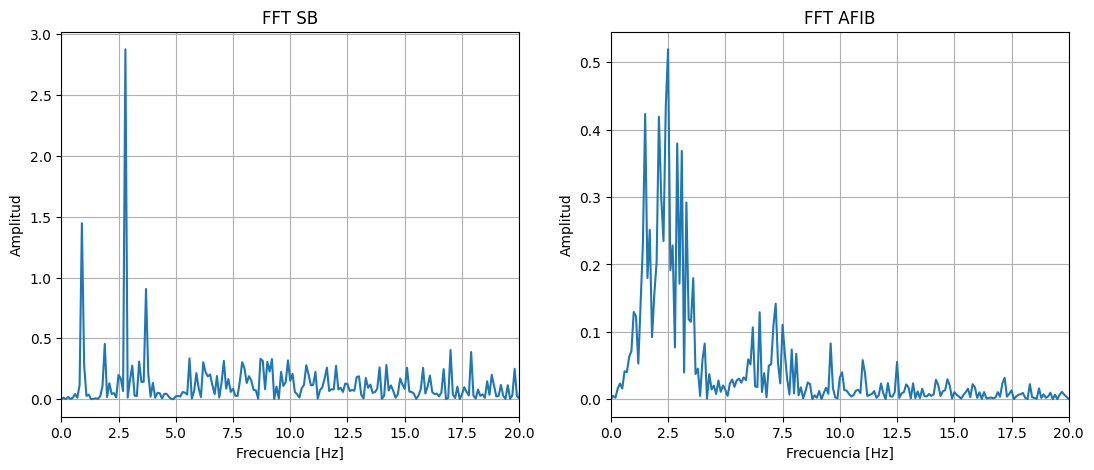

In [ ]:
plt.figure(figsize=(13, 5))
plt.subplot(1,2,1)
plt.title('FFT SB')
plt.xlim([0,20])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.plot(fft_SB[1], np.power(np.abs(fft_SB[0]),2)/fft_SB[2])#La posicion 0 señal, en la 1 vector de frecuencia y en la 2 es el numero de valores en la señal

plt.subplot(1,2,2)
plt.title('FFT AFIB')
plt.grid(True)
plt.plot(fft_AFIB[1], np.power(np.abs(fft_AFIB[0]),2)/fft_AFIB[2])#La posicion 0 señal, en la 1 vector de frecuencia y en la 2 es el numero de valores en la señal
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.xlim([0,20])
plt.show()

### FRECUENCIA DE LA MAXIMA POTENCIA

In [ ]:
def Frec_MaxPot(senal,f):
  magnitudes = np.abs(senal)# calcula el valor absuluto en numero enteros, pero si se le pasan imaginarios calcula la magnitud
  indice_max = np.argmax(magnitudes)# nos da el indice, Encontrar la frecuencia con la máxima potencia
  frecuencia_maxima = f[indice_max]
  return frecuencia_maxima

In [ ]:
frec_maxPot_SB=Frec_MaxPot(fft_SB[0],fft_SB[1])#La posicion 0 señal en la 1 vector de frecuencia
print('Frecuencia de la maxima potencia SB:'+str(round(frec_maxPot_SB,2)))
frec_maxPot_AFIB=Frec_MaxPot(fft_AFIB[0],fft_AFIB[1])#La posicion 0 señal en la 1 vector de frecuencia
print('Frecuencia de la maxima potencia AFIB:'+str(frec_maxPot_AFIB))

Frecuencia de la maxima potencia SB:2.8
Frecuencia de la maxima potencia AFIB:2.5


5. Para cada señal sumar el número de frecuencias que son significativas para bicoherencia (cuales tienen un valor superior a lo de la formula (20%))

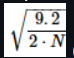

In [ ]:
def Suma_Frecuencias_Significativas(senal,f):
  sumaFrec=0
  for i in range(len(senal)):
    if senal[i]>math.sqrt(9.2/(2*len(senal))):
      sumaFrec=sumaFrec+1
  return sumaFrec


In [ ]:
suma_frec_AFIB=Suma_Frecuencias_Significativas(fft_AFIB[0],fft_AFIB[1])
print('Suma de frecuencias significativas AFIB: '+str(suma_frec_AFIB))
suma_frec_SB=Suma_Frecuencias_Significativas(fft_SB[0],fft_SB[1])
print('Suma de frecuencias significativas SB: '+str(suma_frec_SB))

Suma de frecuencias significativas AFIB: 195500.0
Suma de frecuencias significativas SB: 296500.0000000002


### Ahora, se aplica la rutina para todos los datos y se anexan a un dataframe:

6. Crear una rutina que aplique sobre todos los archivos de la base de datos las rutina 3 al 5 y almacene los resultados en un dataframe donde se pueda registro, tipo de patología y el frecuencia de máxima potencia (fMP) y suma de frecuencias significativas en bicoherencia (sFSB):

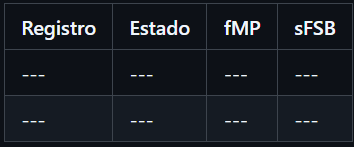

In [ ]:
Max_pot_AFIB=[]
Max_pot_SB=[]

sFSB_AFIB=[]
sFSB_SB=[]

Detrend2_AFIB=[]
Detrend2_SB=[]

senales_bicoherence_AFIB=[]
senales_bicoherence_SB=[]

# AFIB
for i in Derivacion2_AFIB:
    Detrent1=Rutina_D(i)
    Compresion1=comprimir(Detrent1)
    Detrent2=Rutina_D(Compresion1)
    fft_AFIB=fft_signal(Detrent2)

    frec_maxPot_AFIB=Frec_MaxPot(fft_AFIB[0],fft_AFIB[1])                       #Pot maxima
    suma_frec_AFIB=Suma_Frecuencias_Significativas(fft_AFIB[0],fft_AFIB[1])     #Suma de frecuencias
    bicoherence_matrix=calcular_bicoherencia(Detrent2,10,0,10)                     #Matriz de bicoherencia

    Detrend2_AFIB.append(Detrent2)
    senales_bicoherence_AFIB.append(bicoherence_matrix)
    Max_pot_AFIB.append(frec_maxPot_AFIB)
    sFSB_AFIB.append(suma_frec_AFIB)

# SB
for i in Derivacion2_SB:
    Detrent1=Rutina_D(i)
    Compresion1=comprimir(Detrent1)
    Detrent2=Rutina_D(Compresion1)
    fft_SB=fft_signal(Detrent2)

    frec_maxPot_SB=Frec_MaxPot(fft_SB[0],fft_SB[1])
    suma_frec_SB=Suma_Frecuencias_Significativas(fft_SB[0],fft_SB[1])
    bicoherence_matrix=calcular_bicoherencia(Detrent2, 10,0,10)

    Detrend2_SB.append(Detrent2)
    senales_bicoherence_SB.append(bicoherence_matrix)
    Max_pot_AFIB.append(frec_maxPot_SB)
    sFSB_SB.append(suma_frec_SB)

Detrend2_AFIB=np.array(Detrend2_AFIB)
Detrend2_SB=np.array(Detrend2_SB)

Max_pot_AFIB=np.array(Max_pot_AFIB)
Max_pot_SB=np.array(Max_pot_SB)

sFSB_AFIB=np.array(sFSB_AFIB)
sFSB_SB=np.array(sFSB_SB)

senales_bicoherence_AFIB=np.array(senales_bicoherence_AFIB)
senales_bicoherence_SB=np.array(senales_bicoherence_SB)


# CONCATENAR LOS ARRAY PARA AÑADIRLOS AL DF
lista_filtrada_AFIB = [cadena[:-4] for cadena in lista_filtrada_AFIB]
lista_filtrada_SB=lista_filtrada_SB[0:3888]
lista_filtrada_SB = [cadena[:-4] for cadena in lista_filtrada_SB]

Registros_AFIB = np.array(lista_filtrada_AFIB)
Registros_SB = np.array(lista_filtrada_SB[0:3888])
Registros = np.concatenate((Registros_AFIB, Registros_SB), axis=0)

afib_states = ['AFIB'] * 1780
sb_states = ['SB'] * 3888
estado = np.array(afib_states + sb_states)

fmp = np.concatenate((Max_pot_AFIB,Max_pot_SB),axis=0)
sfsb = np.concatenate((sFSB_AFIB,sFSB_SB),axis=0)


data = {'Registro': Registros, 'Estado': estado, 'fMP': fmp, 'sFSB': sfsb}
# Crear el DataFrame
df = pd.DataFrame(data)

desviacion_estandar_AFIB:  1.0162834334916448 
desviacion_estandar_SB:  1.1484499076013712
Coeficiente de correlación (magnitudes): 0.9763010514325681


<Figure size 800x600 with 0 Axes>

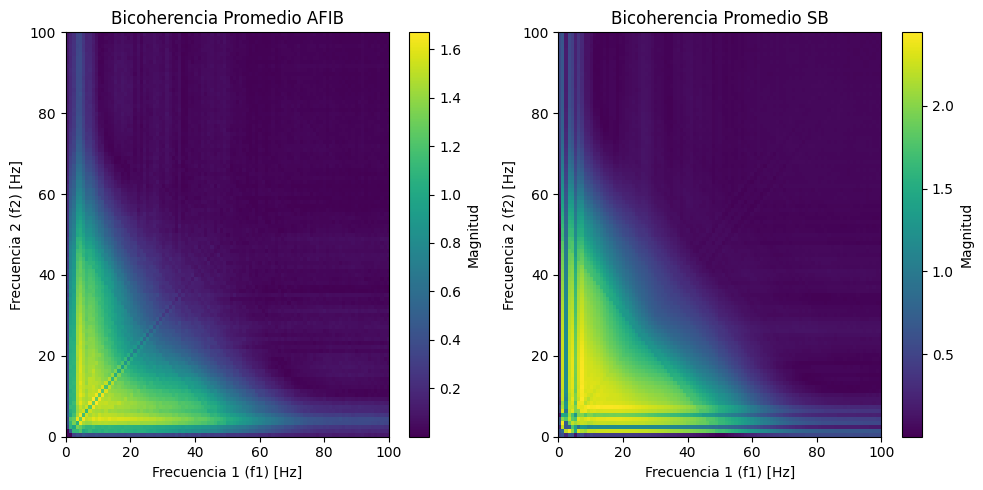

<Figure size 800x600 with 0 Axes>

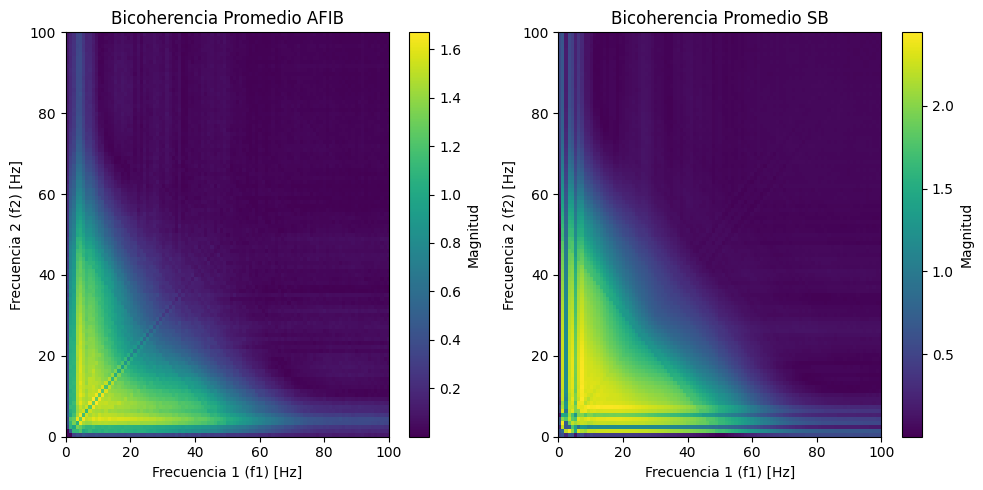

In [ ]:
promedio_bicoherence_AFIB = np.mean(senales_bicoherence_AFIB, axis=0)
promedio_bicoherence_SB = np.mean(senales_bicoherence_SB, axis=0)

desviacion_estandar_AFIB = np.mean(np.std(senales_bicoherence_AFIB, axis=0))
desviacion_estandar_SB = np.mean(np.std(senales_bicoherence_SB, axis=0))
print("desviacion_estandar_AFIB: ",desviacion_estandar_AFIB,"\ndesviacion_estandar_SB: ",desviacion_estandar_SB)

# Calcular el coeficiente de correlación
correlation = np.corrcoef(np.abs(promedio_bicoherence_AFIB.flatten()), np.abs(promedio_bicoherence_SB.flatten()))[0, 1]
print(f"Coeficiente de correlación (magnitudes): {correlation}")

graficar2_bicoherencias(np.abs(promedio_bicoherence_AFIB), np.abs(promedio_bicoherence_SB), 'Promedio AFIB', 'Promedio SB')

## Descripción
Las señales para realizar la bicoherencia de cada enfermedad fueron promediadas para tener una visión global del comportamiento de los datos, no obstante, se debe considerar que esto genera una pérdida de las características de mínimos y máximos de la señal de cada sujeto. Al graficar la señal de cada sujeto son  apreciables diferencias más significativas entre ellos, como se puede observar en el cálculo de la correlación. los espectros de frecuencia fueron acotados entre 0 y 100 Hz, pues son el rango de frecuencias de interés en el análisis de datos de ECG.

Sin embargo, debido a que los sujetos en la base de datos utilizada no están pareados, es decir, no se encuentran asignados en relación 1 a 1 entre AFIB y SB (de hecho, el número total de sujetos de cada estado es distinto) de forma que no están organizados por características que pueden ser relevantes para realizar una comparación directa e individual (edad, género, condiciones cardíacas similares, mismas condiciones de toma de datos, tiempo/avance de la patología diagnosticada), resulta más útil en este caso identificar las características globales de los conjuntos de datos para generalizar los resultados, partiendo de que si se encuentran diferencias, por lo anterior, estas serán las más relevantes.


### Ejemplo bicoherencia de sujetos particulares:


<Figure size 800x600 with 0 Axes>

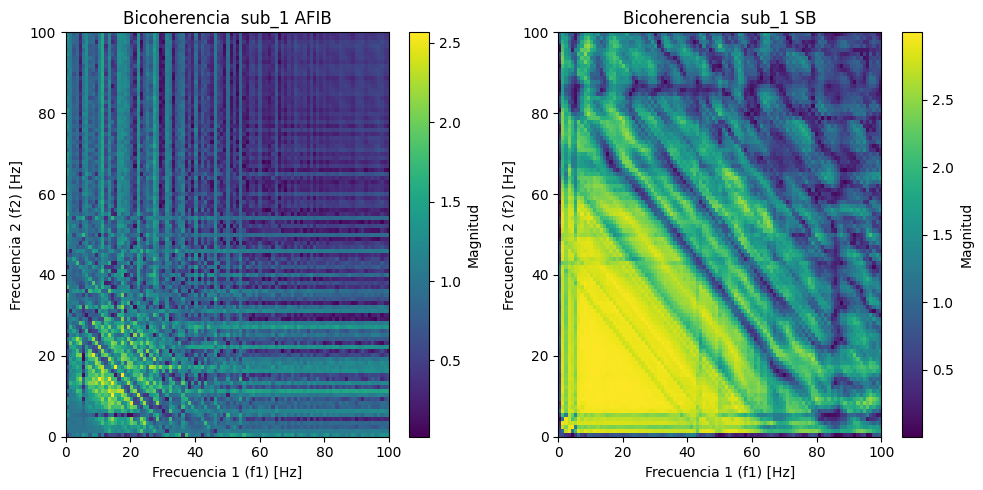

Coeficiente de correlación (magnitudes): 0.46978838215525026


In [ ]:
bicoherence1_magnitude = np.abs(senales_bicoherence_AFIB[0])
bicoherence2_magnitude = np.abs(senales_bicoherence_SB[0])

graficar2_bicoherencias(bicoherence1_magnitude,bicoherence2_magnitude, ' sub_1 AFIB', ' sub_1 SB')

# Calcular el coeficiente de correlación
correlation = np.corrcoef(bicoherence1_magnitude.flatten(), bicoherence2_magnitude.flatten())[0, 1]
print(f"Coeficiente de correlación (magnitudes): {correlation}")


In [ ]:
df

,Registro,Estado,fMP,sFSB
0,MUSE_20180120_121001_43000,AFIB,2.5,195500.0
1,MUSE_20180113_183723_26000,AFIB,4.0,284000.0
2,MUSE_20180113_122318_73000,AFIB,4.9,179000.0
3,MUSE_20180116_133517_43000,AFIB,5.1,161000.0
4,MUSE_20180114_070940_66000,AFIB,1.3,237000.0
...,...,...,...,...
5663,MUSE_20180116_131134_68000,SB,1.0,543750.0
5664,MUSE_20180114_134103_72000,SB,2.9,222000.0
5665,MUSE_20180112_120724_15000,SB,0.9,252000.0
5666,MUSE_20180113_125842_49000,SB,2.9,154000.0


7. Para las señales de análisis del punto 2 aplicar las rutinas del punto 3 al 5 y hacer un informe que permita evidenciar las diferencias entre las señales SB y AFIB utilizando las herramientas de estadística descriptiva (5%)

In [ ]:
promedio_senal_AFIB = np.mean(Detrend2_AFIB, axis=0)
promedio_senal_SB = np.mean(Detrend2_SB, axis=0)
desviacion_estandar =np.mean(np.std(Detrend2_AFIB, axis=0))
desviacion_estandar2 =np.mean( np.std(Detrend2_SB, axis=0))
print("desviacion_estandar AFIB: ",desviacion_estandar,"\ndesviacion_estandar_SB: ",desviacion_estandar2)

desviacion_estandar AFIB:  0.12516535392329037 
desviacion_estandar_SB:  0.11486437949666847


**Comprobación de supuestos (Normalidad, Homocedasticidad).**

Dado que las señales de los sujetos se tomaron de manera independiente y sin influencia de otros sujetos o condiciones externas simultáneas, se asume la independencia de los datos.

### NORMALIDAD

In [ ]:
def evaluar_normalidad(p):
  alpha = 0.05  # Nivel de significancia
  if p > alpha:
    return "Los datos siguen una distribución normal."
  else:
    return "Los datos NO siguen una distribución normal."

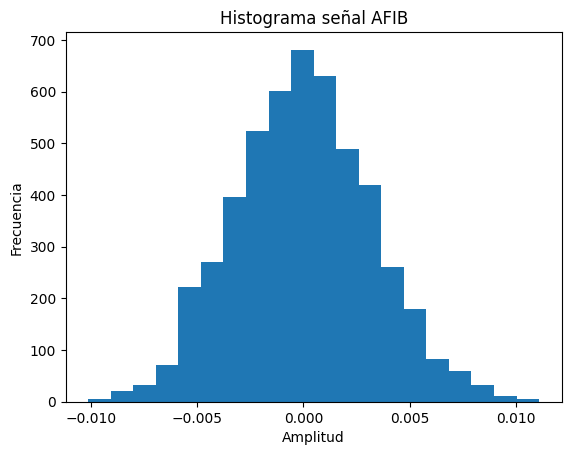

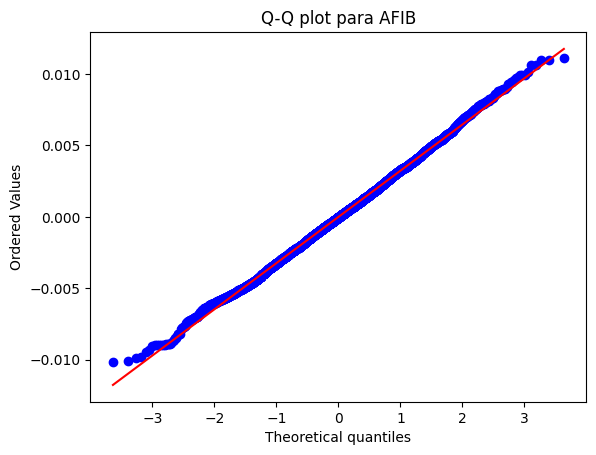

Estadístico de Shapiro-Wilk: 0.9986774605767712
p-value: 0.0004056483366471786


'Los datos NO siguen una distribución normal.'

In [ ]:
# Histograma
plt.hist(promedio_senal_AFIB, bins=20)
plt.title('Histograma señal AFIB')
plt.xlabel('Amplitud')
plt.ylabel('Frecuencia')
plt.show()
# Gráfico Q-Q
stats.probplot(promedio_senal_AFIB, plot=plt)
plt.title('Q-Q plot para AFIB')
plt.show()

# Test de Shapiro-Wilk
stat, p = stats.shapiro(promedio_senal_AFIB)
print('Estadístico de Shapiro-Wilk:', stat)
print('p-value:', p)
evaluar_normalidad(p)

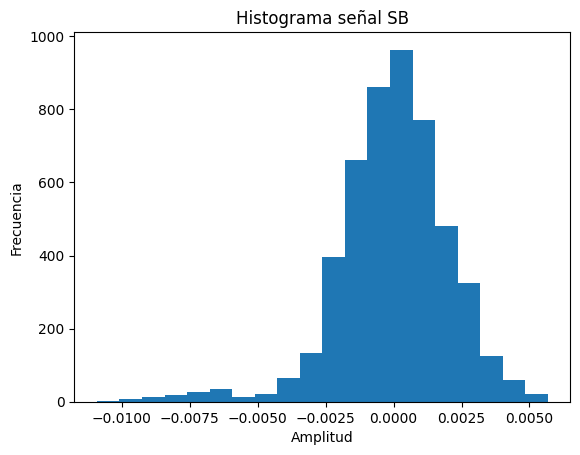

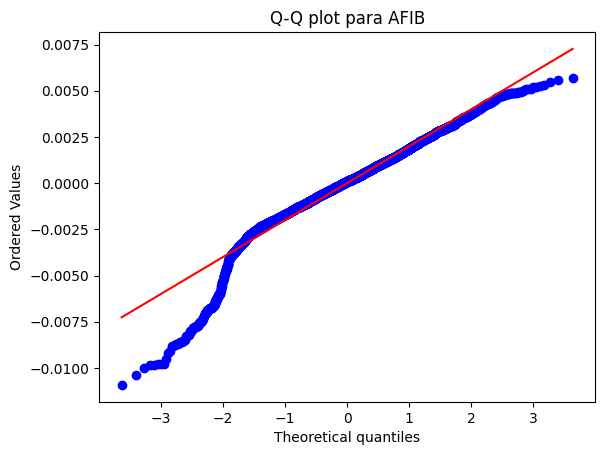

Estadístico de Shapiro-Wilk: 0.9524790902546791
p-value: 1.6283344893139733e-37


'Los datos NO siguen una distribución normal.'

In [ ]:
# Histograma
plt.hist(promedio_senal_SB, bins=20)
plt.title('Histograma señal SB')
plt.xlabel('Amplitud')
plt.ylabel('Frecuencia')
plt.show()
# Gráfico Q-Q
stats.probplot(promedio_senal_SB, plot=plt)
plt.title('Q-Q plot para AFIB')
plt.show()

# Test de Shapiro-Wilk
stat, p = stats.shapiro(promedio_senal_SB)
print('Estadístico de Shapiro-Wilk:', stat)
print('p-value:', p)
evaluar_normalidad(p)

### Homocedasticidad

Estadístico de Levene: 997.3214488252827
Valor p: 9.773026740839374e-209
No hay homocedasticidad entre los grupos AFIB y SB.


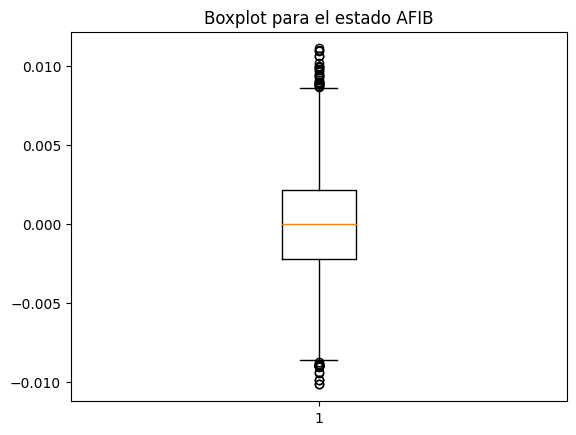

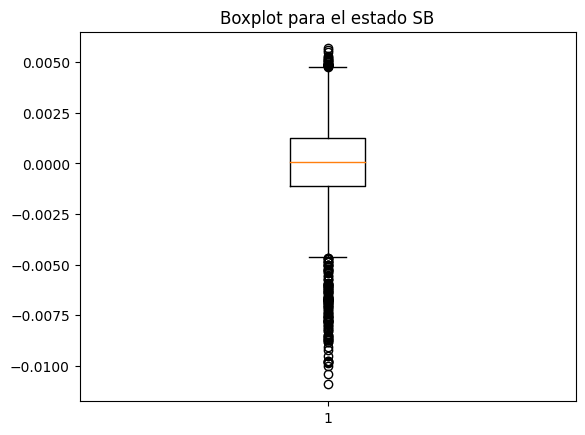

In [ ]:
from scipy.stats import levene

statistic, pvalue = levene(promedio_senal_AFIB, promedio_senal_SB)

print("Estadístico de Levene:", statistic)
print("Valor p:", pvalue)
if pvalue > 0.05:
    print("Hay homocedasticidad entre los grupos AFIB y SB.")
else:
    print("No hay homocedasticidad entre los grupos AFIB y SB.")

plt.boxplot(promedio_senal_AFIB)
plt.title("Boxplot para el estado AFIB")
plt.show()
plt.boxplot(promedio_senal_SB)
plt.title("Boxplot para el estado SB")
plt.show()

### Como no se cumplen los supuestos de normalidad ni de homocedasticidad aplicamos pruebas no parametricas:

### Prueba U de Mann-Whitney

In [ ]:
from scipy.stats import mannwhitneyu

U1, p = mannwhitneyu(promedio_senal_AFIB, promedio_senal_SB)
print("Estadístico U:", U1)
print("Valor p:", p)

if p < 0.05:
    print("Existe una diferencia significativa entre los grupos AFIB y SB.")
else:
    print("No se encontró una diferencia significativa entre los grupos AFIB y SB.")

Estadístico U: 12251894.0
Valor p: 0.08564362151777886
No se encontró una diferencia significativa entre los grupos AFIB y SB.


### Prueba de Kolmogorov-Smirnov

In [ ]:
statistic, p_value = stats.ks_2samp(promedio_senal_AFIB, promedio_senal_SB)

# Imprimir resultados
print('Statistic:', statistic)
print('p-value:', p_value)

# Interpretar resultados
alpha = 0.05
if p_value < alpha:
    print("Las muestras provienen de distribuciones diferentes.")
else:
    print("No se puede rechazar la hipótesis de que las muestras provienen de la misma distribución.")

Statistic: 0.158
p-value: 7.414044864541083e-55
Las muestras provienen de distribuciones diferentes.


## Descripción

Después de realizar las gráficas para la estadística descriptiva, se observa que en el gráfico Q-Q en ciertos puntos tanto la señal de AFIB como la SB se adecuan a la distribución normal, pero en sus extremos presentan valores que se salen de esta distribución, además, al hacer la prueba de normalidad se confirma que ninguna de las dos señales distribuye normal, tampoco presentan homocedasticidad y por lo tanto, se procede a hacer pruebas no paramétricas debido a la relevancia del supuesto de normalidad.  

Al realizar la prueba de U Mann-Whitney, se concluye que no existen diferencias significativas entre las señales respecto a sus medianas, sin embargo, la prueba KS nos muestra una diferencia sustancial en cuando a la distribución de los mismos. Esto sugiere que para ambos conjuntos de datos se logra diferenciar por su distribución que provienen de distintas fuentes.



8. Indicar si hay o no diferencias estadísticas entre las características espectrales del punto 4 y 5 para las dos poblaciones de estudio (5%)

### Comprobación de supuestos (Normalidad, Homocedasticidad).
Dado que las señales de los sujetos se tomaron de manera independiente y sin influencia de otros sujetos o condiciones externas simultáneas, sea asume la independencia de los datos.

## Para AFIB

### NORMALIDAD

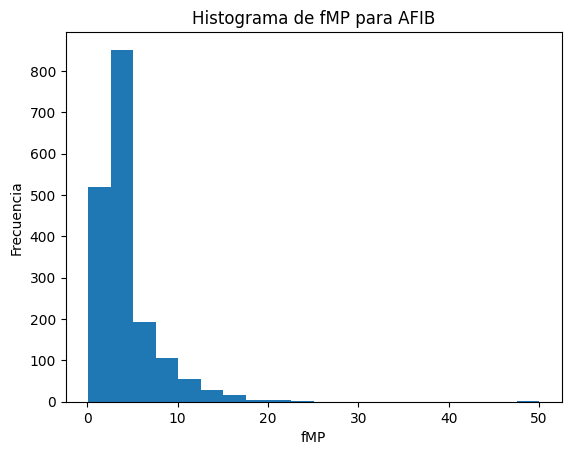

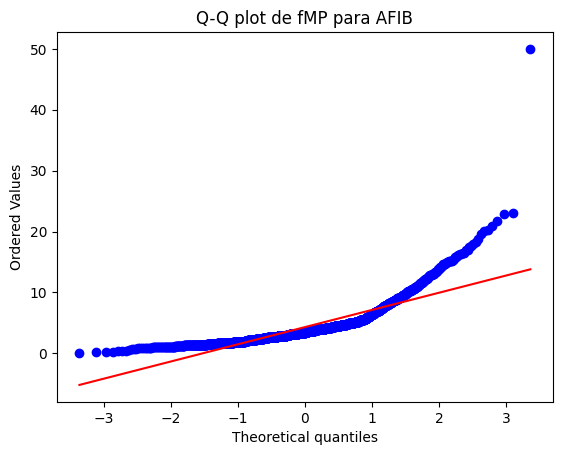

Estadístico de Shapiro-Wilk: 0.7413084430737853
p-value: 2.780253778687276e-46


'Los datos NO siguen una distribución normal.'

In [ ]:
df_afib = df[df['Estado'] == 'AFIB']
# Histograma
plt.hist(df_afib['fMP'], bins=20)
plt.title('Histograma de fMP para AFIB')
plt.xlabel('fMP')
plt.ylabel('Frecuencia')
plt.show()
# Gráfico Q-Q
stats.probplot(df_afib['fMP'], plot=plt)
plt.title('Q-Q plot de fMP para AFIB')
plt.show()

# Test de Shapiro-Wilk
stat, p = stats.shapiro(df_afib['fMP'])
print('Estadístico de Shapiro-Wilk:', stat)
print('p-value:', p)
evaluar_normalidad(p)

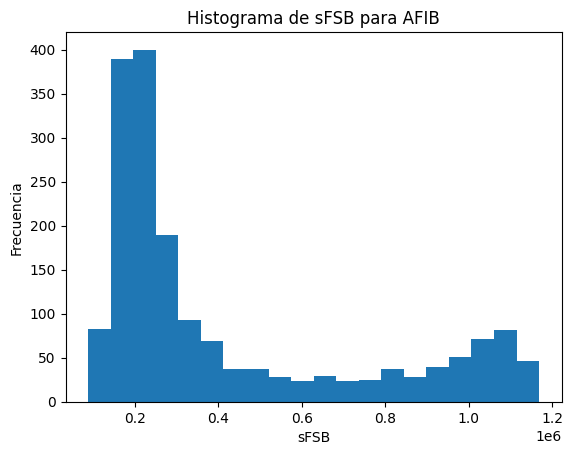

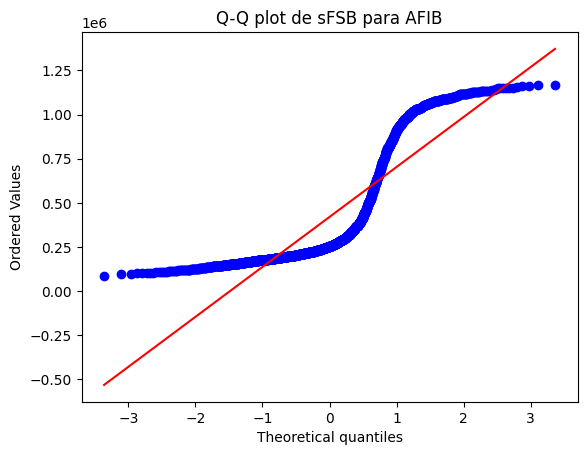

Estadístico de Shapiro-Wilk: 0.7708983659924737
p-value: 2.162522555619871e-44


'Los datos NO siguen una distribución normal.'

In [ ]:
df_afib = df[df['Estado'] == 'AFIB']
# Histograma
plt.hist(df_afib['sFSB'], bins=20)
plt.title('Histograma de sFSB para AFIB')
plt.xlabel('sFSB')
plt.ylabel('Frecuencia')
plt.show()
# Gráfico Q-Q
stats.probplot(df_afib['sFSB'], plot=plt)
plt.title('Q-Q plot de sFSB para AFIB')
plt.show()

# Test de Shapiro-Wilk
stat, p = stats.shapiro(df_afib['sFSB'])
print('Estadístico de Shapiro-Wilk:', stat)
print('p-value:', p)
evaluar_normalidad(p)

### Homocedasticidad

Estadístico de Levene: 1187.9257985997751
Valor p: 7.03270815530624e-225
No hay homocedasticidad respecto a AFIB.


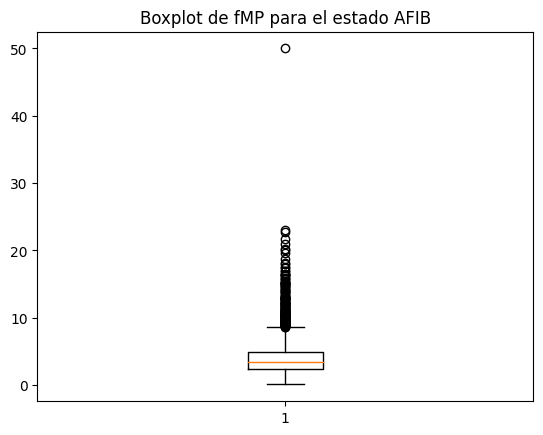

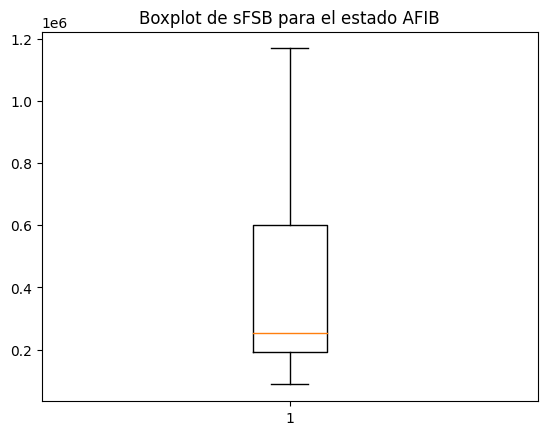

In [ ]:
df_afib = df[df['Estado'] == 'AFIB']
fmp_afib = df_afib['fMP']
sFSB_afib = df_afib['sFSB']

statistic, pvalue = levene(fmp_afib, sFSB_afib)

print("Estadístico de Levene:", statistic)
print("Valor p:", pvalue)
if pvalue > 0.05:
    print("Hay homocedasticidad respecto a AFIB.")
else:
    print("No hay homocedasticidad respecto a AFIB.")


plt.boxplot(fmp_afib)
plt.title("Boxplot de fMP para el estado AFIB")
plt.show()
plt.boxplot(sFSB_afib)
plt.title("Boxplot de sFSB para el estado AFIB")
plt.show()

### Por lo tanto, como no se cumple el supuesto de normalidad ni de homocedasticidad, aplicamos pruebas no parametricas:

### Prueba de Kolmogorov-Smirnov

In [ ]:
df_AFIB_fMP = df[df['Estado'] == 'AFIB']['fMP']
df_AFIB_sFSB = df[df['Estado'] == 'AFIB']['sFSB']

statistic, p_value = stats.ks_2samp(df_AFIB_fMP, df_AFIB_sFSB)

# Imprimir resultados
print('Statistic:', statistic)
print('p-value:', p_value)

# Interpretar resultados
alpha = 0.05
if p_value < alpha:
    print("La distribución acumulada de las muestras sugiere que provienen de distribuciones distintas")
else:
    print("No se puede rechazar la hipótesis de que las muestras provienen de la misma distribución.")

Statistic: 1.0
p-value: 0.0
La distribución acumulada de las muestras sugiere que provienen de distribuciones distintas


## Descripción

Para determinar si habían o no diferencias significativas entre la fMP (frecuencia con mayor potencia) y sFSB (suma de frecuencas significativas en bicoherencia) en AFIB, se inició con la comprobación de los supuestos para determinar el tipo de prueba a realizar (paramétrica o no paramétrica). Para el supuesto de normalidad, como resultado se obtuvo que ninguna de las dos características tiene una distribución normal y tampoco presentan homocedasticidad.

Fue aplicada la prueba de u K-S y encontramos que hay diferencias significativas entre las distribuciones de los datos, lo que sugiere que ambos valores (sFSB y AFIB) evalúan distintas características de las señales por lo que retulan complementarios. Además, los valores de fMP en AFIB muestran una gran cantidad de puntos atípicos, lo que puede indicar que las frecuencias halladas con la mayor potencia no representan invididualmente el comportamiento de la patología, dado que no coinciden en estos casos. Sin embargo, podría evaluarse no sólo la fMP sino un número de frecuencias con altos valores de energía, para volver a realizar esta prueba y determinar si efectivamente las 5 o 10 (por ejemplo) frecuencias con mayor energía se agrupan en valores similares.

## Para SB

### NORMALIDAD

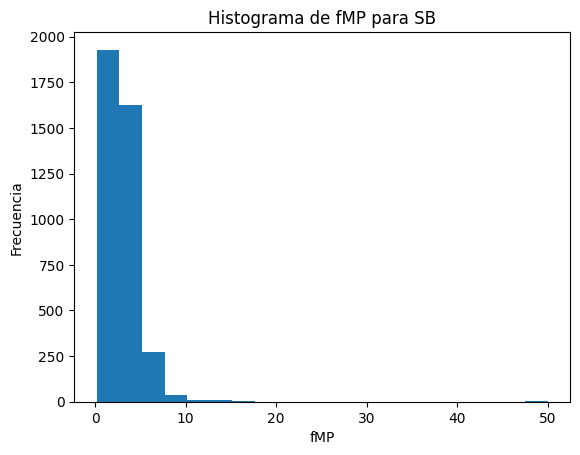

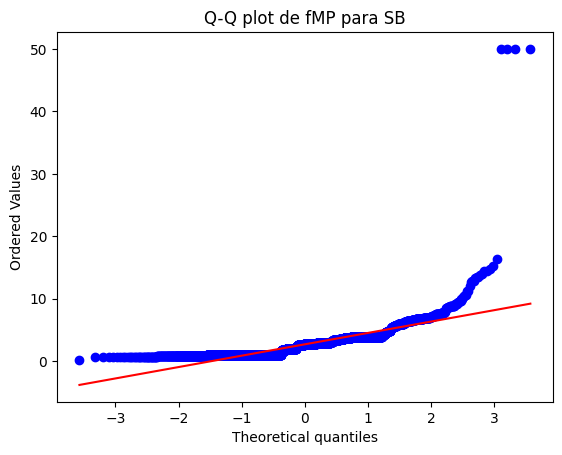

Estadístico de Shapiro-Wilk: 0.5874331146189905
p-value: 2.7353257896621405e-70


'Los datos NO siguen una distribución normal.'

In [ ]:
df_sb = df[df['Estado'] == 'SB']
# Histograma
plt.hist(df_sb['fMP'], bins=20)
plt.title('Histograma de fMP para SB')
plt.xlabel('fMP')
plt.ylabel('Frecuencia')
plt.show()
# Gráfico Q-Q
stats.probplot(df_sb['fMP'], plot=plt)
plt.title('Q-Q plot de fMP para SB')
plt.show()

# Test de Shapiro-Wilk
stat, p = stats.shapiro(df_sb['fMP'])
print('Estadístico de Shapiro-Wilk:', stat)
print('p-value:', p)
evaluar_normalidad(p)

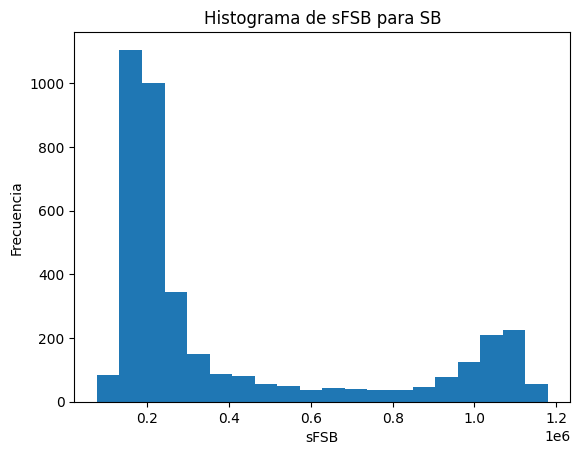

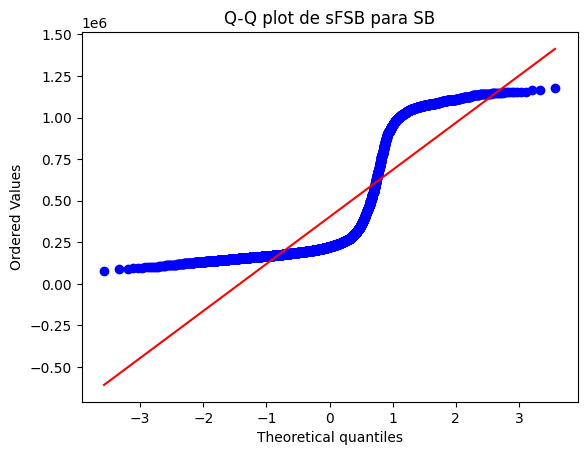

Estadístico de Shapiro-Wilk: 0.7175435566366148
p-value: 6.683486822719426e-63


'Los datos NO siguen una distribución normal.'

In [ ]:
df_sb = df[df['Estado'] == 'SB']
# Histograma
plt.hist(df_sb['sFSB'], bins=20)
plt.title('Histograma de sFSB para SB')
plt.xlabel('sFSB')
plt.ylabel('Frecuencia')
plt.show()
# Gráfico Q-Q
stats.probplot(df_sb['sFSB'], plot=plt)
plt.title('Q-Q plot de sFSB para SB')
plt.show()

# Test de Shapiro-Wilk
stat, p = stats.shapiro(df_sb['sFSB'])
print('Estadístico de Shapiro-Wilk:', stat)
print('p-value:', p)
evaluar_normalidad(p)

### Homocedasticidad

Estadístico de Levene: 2087.900094819201
Valor p: 0.0
No hay homocedasticidad respecto a SB.


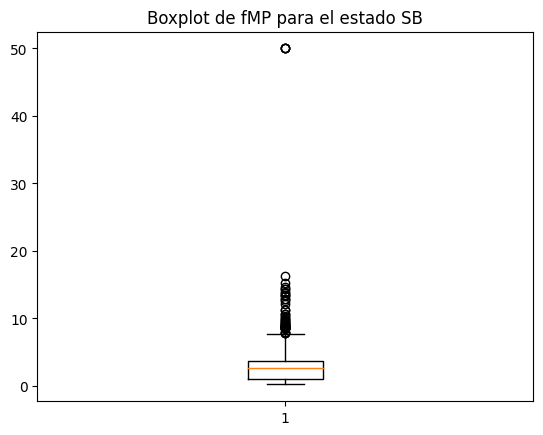

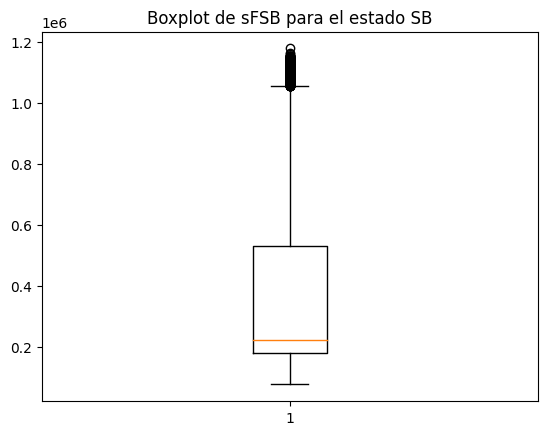

In [ ]:
df_sb = df[df['Estado'] == 'SB']
fmp_sb = df_sb['fMP']
sFSB_sb = df_sb['sFSB']

statistic, pvalue = levene(fmp_sb, sFSB_sb)

print("Estadístico de Levene:", statistic)
print("Valor p:", pvalue)

if pvalue < 0.05:
    print("No hay homocedasticidad respecto a SB.")
else:
    print("Hay homocedasticidad respecto a SB.")


plt.boxplot(fmp_sb)
plt.title("Boxplot de fMP para el estado SB")
plt.show()
plt.boxplot(sFSB_sb)
plt.title("Boxplot de sFSB para el estado SB")
plt.show()

## Como no se cumple el supuesto de normalidad ni de homocedasticidad, se procede con pruebas no paramétricas

### Prueba de Kolmogorov-Smirnov

In [ ]:
df_SB_fMP = df[df['Estado'] == 'SB']['fMP']
df_SB_sFSB = df[df['Estado'] == 'SB']['sFSB']

statistic, p_value = stats.ks_2samp(df_SB_fMP, df_SB_sFSB)

# Imprimir resultados
print('Statistic:', statistic)
print('p-value:', p_value)

# Interpretar resultados
alpha = 0.05


if p_value < alpha:
    print("La distribución acumulada de las muestras sugiere que provienen de distribuciones distintas.")
else:
    print("No se puede rechazar la hipótesis de que las muestras provienen de la misma distribución.")

Statistic: 1.0
p-value: 0.0
La distribución acumulada de las muestras sugiere que provienen de distribuciones distintas.


## Descripción

Para la SB se procedió de igual forma que para la AFIB, primero se evaluaron los supuestos de normalidad y de homocedasticidad, obteniendo que ni la fMP ni la sFSB distribuyen de manera normal.
Existe una diferencia significativa entre las varianzas (NO tienen homocedasticidad). Además, al realizar la prueba K-S se encontró que las dos características presentan distribuciones acumuladas distintas. Esto permite inferir que ambos valores extraen características distintas del mismo conjunto de datos, permitiendo proyectar un análisis más profundo (por ejemplo, contrastando con sujetos de control/sanos) de qué particularidades de las patologías, en contraste con sujetos sanos, hacen que varíen independientemente los valores de fMP y sFSB.


9. Conclusiones

* En las señales de EKG, diferenciar enfermedades mediante estadística
descriptiva y pruebas estadísticas resulta complejo. Nuestro análisis muestra que las señales de AFIB y SB no siguen una distribución normal y que tampoco presentan homocedasticidad. Por lo tanto, se realiza una prueba no paramétrica, en específico la prueba U de Mann-Whitney y K-S y no encontramos diferencias significativas entre las señales pero a pesar de esto, con la prueba K-S se sugiere que las muestras provienen de diferentes distribuciones. Sin embargo, un análisis estadístico de los datos de la frecuencia con mayor potencia (FMP) y la suma de frecuencias significativas en bicoherencia (sFSB) revela diferencias clave: ni la FMP ni la sFSB presentan homocedasticidad y tampoco normalidad. Al aplicar la prueba K-S a estos datos, encontramos diferencias significativas entre ellos, lo que podría facilitar una mejor diferenciación entre las enfermedades y, en consecuencia, permitir el desarrollo de un modelo con mayor diferenciador basado en estas dos características.

* El análisis temporal es fundamental e intuitivo, sin embargo, implementar análisis frecuencial de niveles más profundos que sólo empleando el espectro de frecuencias, abre la posibilidad de encontrar relaciones entre los conjuntos de datos más específicas e igualmente dicientes. Se lograron implementar pruebas estadísticas a un análisis frecuencial que arrojaron diferencias relevantes, principalmente en el origen de los datos, dando cuenta de su distribución, esto a pesar de que los datos rondan en valores de tendencia central similares, con lo cuál se reporta un primer acercamiento a un análisis que puede llevar a caracterizar claramente entre patologías utilizando métodos como bicoherencia para complementar con otros análisis más comúnmente utilizados.

